# Making line plots

### Import packages

In [1]:
import numpy                          as np
import matplotlib.pyplot              as plt

# import plons scripts
import plons
import plons.SmoothingKernelScript    as sk
import plons.PhysicalQuantities       as pq
import plons.ConversionFactors_cgs    as cgs

### Setting information about data

In [2]:
prefix = "wind"
loc = "/STER/matse/Papers/Esseldeurs+2023/Phantom/High/binary6Lucy/"
outputloc = "."
dump = loc+"wind_00600"

### Loading setup and dump

In [3]:
setup     = plons.LoadSetup(loc, prefix)

In [4]:
dumpData  = plons.LoadFullDump(dump, setup)

### Making x and z lines on which to smooth

In [5]:
n = 200
rx = np.array((np.linspace(-150, 150, n), np.zeros(n), np.zeros(n))).transpose()*cgs.au
theta = pq.getPolarAngleCompanion(dumpData['posComp'][0], dumpData['posComp'][1])
rz = np.array((np.zeros(n), np.zeros(n), np.linspace(-150, 150, n))).transpose()*cgs.au

### Smoothing the data on the lines

In [6]:
smoothx = sk.getSmoothingKernelledPix(100, dumpData, ['rho'], sk.rotatePixCoordAroundZ(theta, rx))
smoothz = sk.getSmoothingKernelledPix(100, dumpData, ['rho'], rz)

### Plotting the lines

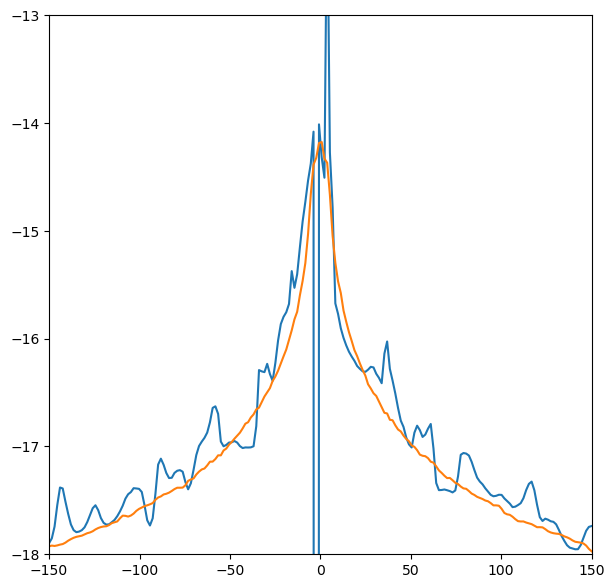

In [7]:
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.plot(rx[:,0]/cgs.au, np.log10(smoothx["rho"]+1e-99))
ax.plot(rz[:,2]/cgs.au, np.log10(smoothz["rho"]+1e-99))
ax.set_xlim(-150, 150)
ax.set_ylim(-18, -13)

plt.show()